<img src = "https://thumbs2.imgbox.com/32/93/xRH3CBEG_t.png" width="250">

# Análise Exploratória dos Dados
---

In [1]:
# importanto bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importando dados
dados_LightGBM = pd.read_csv('dados/dados_LightGBM.csv')

In [3]:
# o dataset possui 877648 observações e 19 variáveis
dados_LightGBM.shape

(877648, 18)

In [4]:
# 5 primeiras observações
dados_LightGBM.head()

last_pymnt_amnt  funded_amnt  max_bal_bc  out_prncp  \
0          6196.34       9000.0      1301.0       0.00   
1          1562.75       8300.0      3075.0       0.00   
2          2659.10       4225.0         0.0       0.00   
3           870.67      28000.0         0.0       0.00   
4            90.34       3000.0       625.0    1138.49   

   mths_since_last_credit_pull_d  all_util  term  int_rate addr_state grade  \
0                            8.0       5.0    36      5.32         IN     A   
1                            8.0      62.0    36      9.44         MD     B   
2                           12.0       0.0    36     17.57         FL     D   
3                           35.0       0.0    36      7.49         OH     A   
4                            8.0      33.0    36      5.31         NC     A   

   mths_since_earliest_cr_line  tot_cur_bal  total_rev_hi_lim  \
0                        273.0       7063.0          120600.0   
1                        112.0      26958.0           19200.0   
2                        405.0      35796.0            9380.0   
3                        423.0     503070.0           75900.0   
4                        251.0     305664.0           47300.0   

  verification_status    dti  delinq_2yrs  open_acc  target  
0     Source Verified  10.39          1.0      25.0       1  
1     Source Verified  16.91          0.0       5.0       1  
2        Not Verified  29.25          0.0      18.0       1  
3     Source Verified   8.97          2.0      19.0       1  
4        Not Verified  14.60          0.0       9.0       1

In [5]:
# 5 últimas observações
dados_LightGBM.tail()

last_pymnt_amnt  funded_amnt  max_bal_bc  out_prncp  \
877643         12709.79      29000.0     13109.0       0.00   
877644           391.50      13000.0         0.0    2312.68   
877645           395.55      12000.0      6337.0       0.00   
877646          3833.32      10000.0         0.0       0.00   
877647           798.49      40000.0     13660.0   25729.95   

        mths_since_last_credit_pull_d  all_util  term  int_rate addr_state  \
877643                            8.0      52.0    36      5.32         IN   
877644                            8.0      83.0    36      5.32         KY   
877645                           43.0      68.0    36     11.47         CA   
877646                            8.0       0.0    36     12.69         CA   
877647                            8.0      16.0    60      7.34         FL   

       grade  mths_since_earliest_cr_line  tot_cur_bal  total_rev_hi_lim  \
877643     A                        321.0     141500.0           62100.0   
877644     A                        267.0     125982.0           28700.0   
877645     B                        219.0      42108.0           19600.0   
877646     C                        324.0     126324.0           46700.0   
877647     A                        368.0     148102.0           72500.0   

       verification_status    dti  delinq_2yrs  open_acc  target  
877643     Source Verified  13.32          0.0      13.0       1  
877644        Not Verified  18.81          0.0      13.0       1  
877645     Source Verified  22.36          0.0      12.0       0  
877646            Verified  27.81          1.0      15.0       1  
877647        Not Verified  25.96          0.0      11.0       1

In [6]:
# separação do dataset em variáveis numéricas e categóricas
var_num = dados_LightGBM.select_dtypes(include = np.number).columns.tolist()
var_cat = dados_LightGBM.select_dtypes('object').columns.tolist()

In [7]:
# medidas resumo das variáveis quantitativas
dados_LightGBM[var_num].describe(percentiles = [.25, .5, .75, .95, .99])

last_pymnt_amnt    funded_amnt     max_bal_bc      out_prncp  \
count    877648.000000  877648.000000  877648.000000  877648.000000   
mean       3468.801577   15345.913396    4230.978431    4036.452655   
std        6110.873910    9466.009368    5541.568807    7485.346961   
min       -5905.150000     500.000000       0.000000       0.000000   
25%         264.610000    8000.000000       0.000000       0.000000   
50%         583.925000   13000.000000    2682.000000       0.000000   
75%        3906.425000   20000.000000    6186.000000    5334.042500   
95%       17136.986000   35000.000000   14817.000000   21534.621500   
99%       28511.629400   40000.000000   24002.000000   32370.454100   
max       41418.340000   40000.000000  500000.000000   40000.000000   

       mths_since_last_credit_pull_d       all_util           term  \
count                  877648.000000  877648.000000  877648.000000   
mean                       16.038015      39.636676      43.094872   
std                        14.334131      31.041082      10.951706   
min                         0.000000       0.000000      36.000000   
25%                         8.000000       0.000000      36.000000   
50%                         8.000000      45.000000      36.000000   
75%                        19.000000      65.000000      60.000000   
95%                        48.000000      86.000000      60.000000   
99%                        69.000000      99.000000      60.000000   
max                       164.000000     239.000000      60.000000   

            int_rate  mths_since_earliest_cr_line   tot_cur_bal  \
count  877648.000000                877648.000000  8.776480e+05   
mean       13.043788                   243.218394  1.418145e+05   
std         4.859772                    95.789188  1.634241e+05   
min         5.310000                     0.000000  0.000000e+00   
25%         9.170000                   179.000000  2.751400e+04   
50%        12.490000                   228.000000  7.581900e+04   
75%        15.990000                   294.000000  2.136290e+05   
95%        22.350000                   426.000000  4.485500e+05   
99%        27.270000                   535.000000  7.002791e+05   
max        30.990000                  1043.000000  9.971659e+06   

       total_rev_hi_lim            dti    delinq_2yrs       open_acc  \
count      8.776480e+05  877648.000000  877648.000000  877648.000000   
mean       3.574251e+04      19.290343       0.288651      11.670263   
std        3.722942e+04      16.019488       0.843553       5.727837   
min        0.000000e+00       0.000000       0.000000       0.000000   
25%        1.490000e+04      12.050000       0.000000       8.000000   
50%        2.620000e+04      18.070000       0.000000      11.000000   
75%        4.490000e+04      24.870000       0.000000      15.000000   
95%        9.520000e+04      34.690000       2.000000      22.000000   
99%        1.676000e+05      48.320000       4.000000      30.000000   
max        9.999999e+06     999.000000      58.000000     104.000000   

              target  
count  877648.000000  
mean        0.869974  
std         0.336332  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
95%         1.000000  
99%         1.000000  
max         1.000000

In [8]:
# Estatísticas dos dados categóricos
dados_LightGBM.describe(include='object').T

count unique              top    freq
addr_state           877648     51               CA  121479
grade                877648      7                B  257221
verification_status  877648      3  Source Verified  341893

In [9]:
# número de classes únicas de cada variável categórica
dados_LightGBM[var_cat].nunique()

addr_state             51
grade                   7
verification_status     3
dtype: int64

### Avaliando a distribuição das variáveis quantitativas

- Presença de outliers em todas as variáveis, com exceção de term.

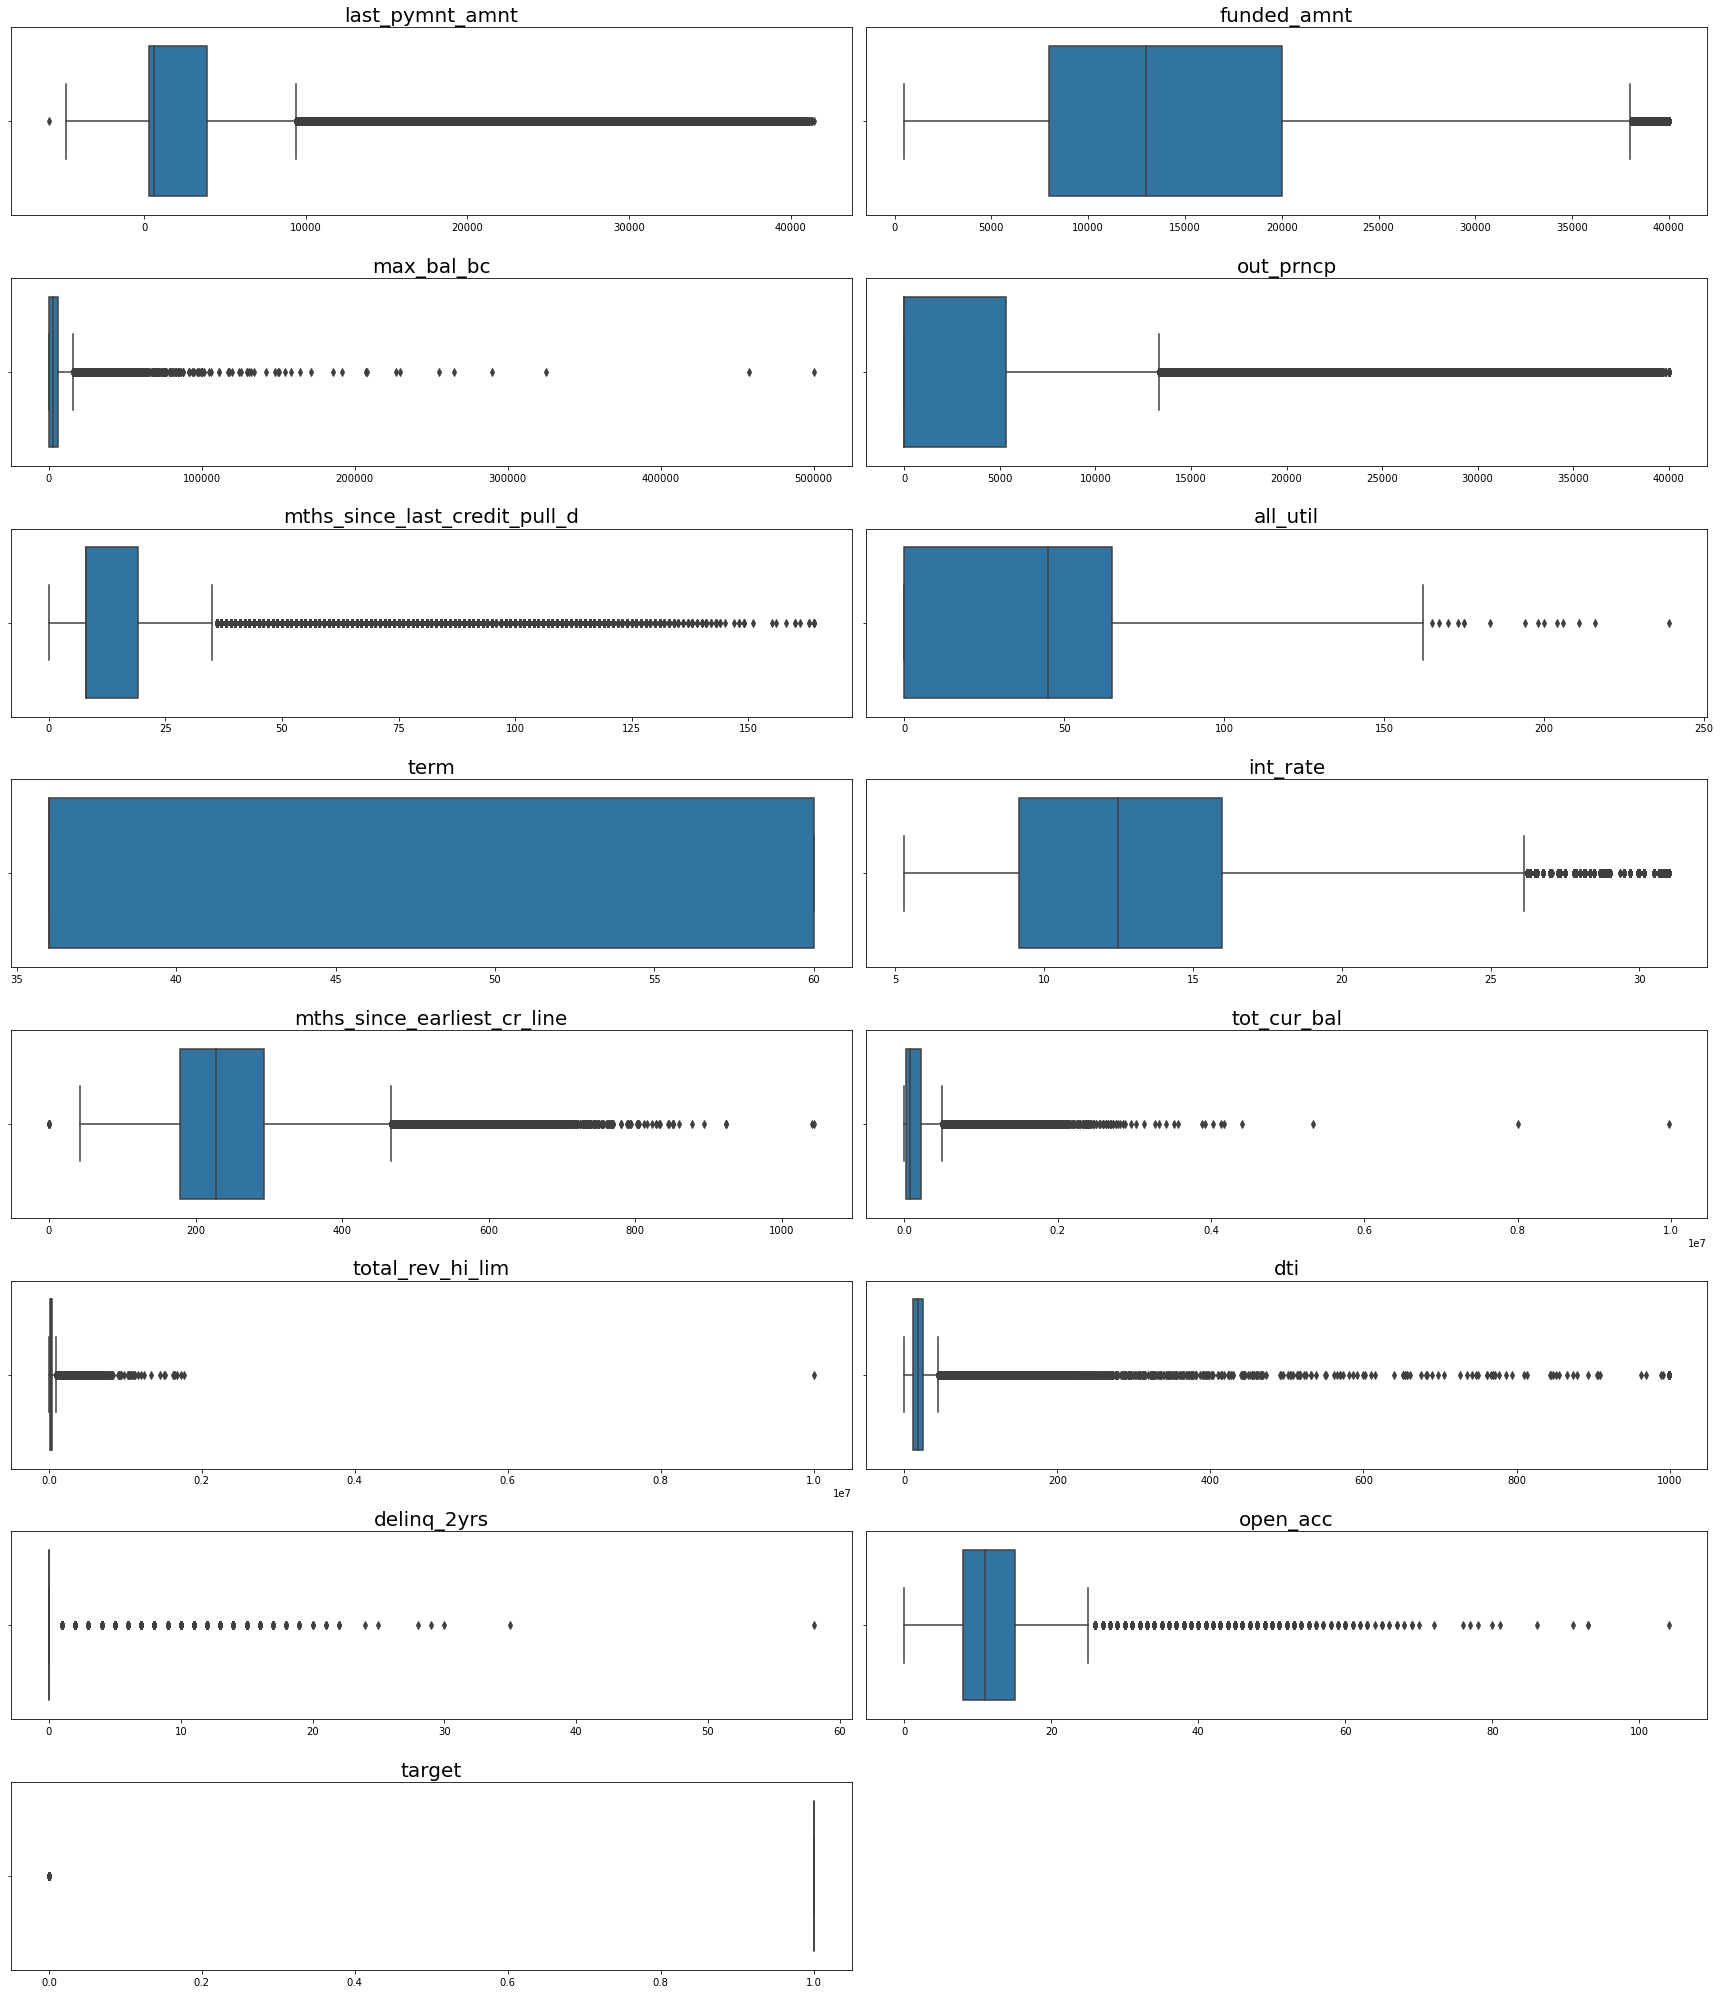

In [11]:
plt.figure(figsize=(24, 28))

for i in range(0, len(var_num)):
    plt.subplot(8, 2, i + 1)
    sns.boxplot(x = dados_LightGBM[var_num[i]])
    plt.title(var_num[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

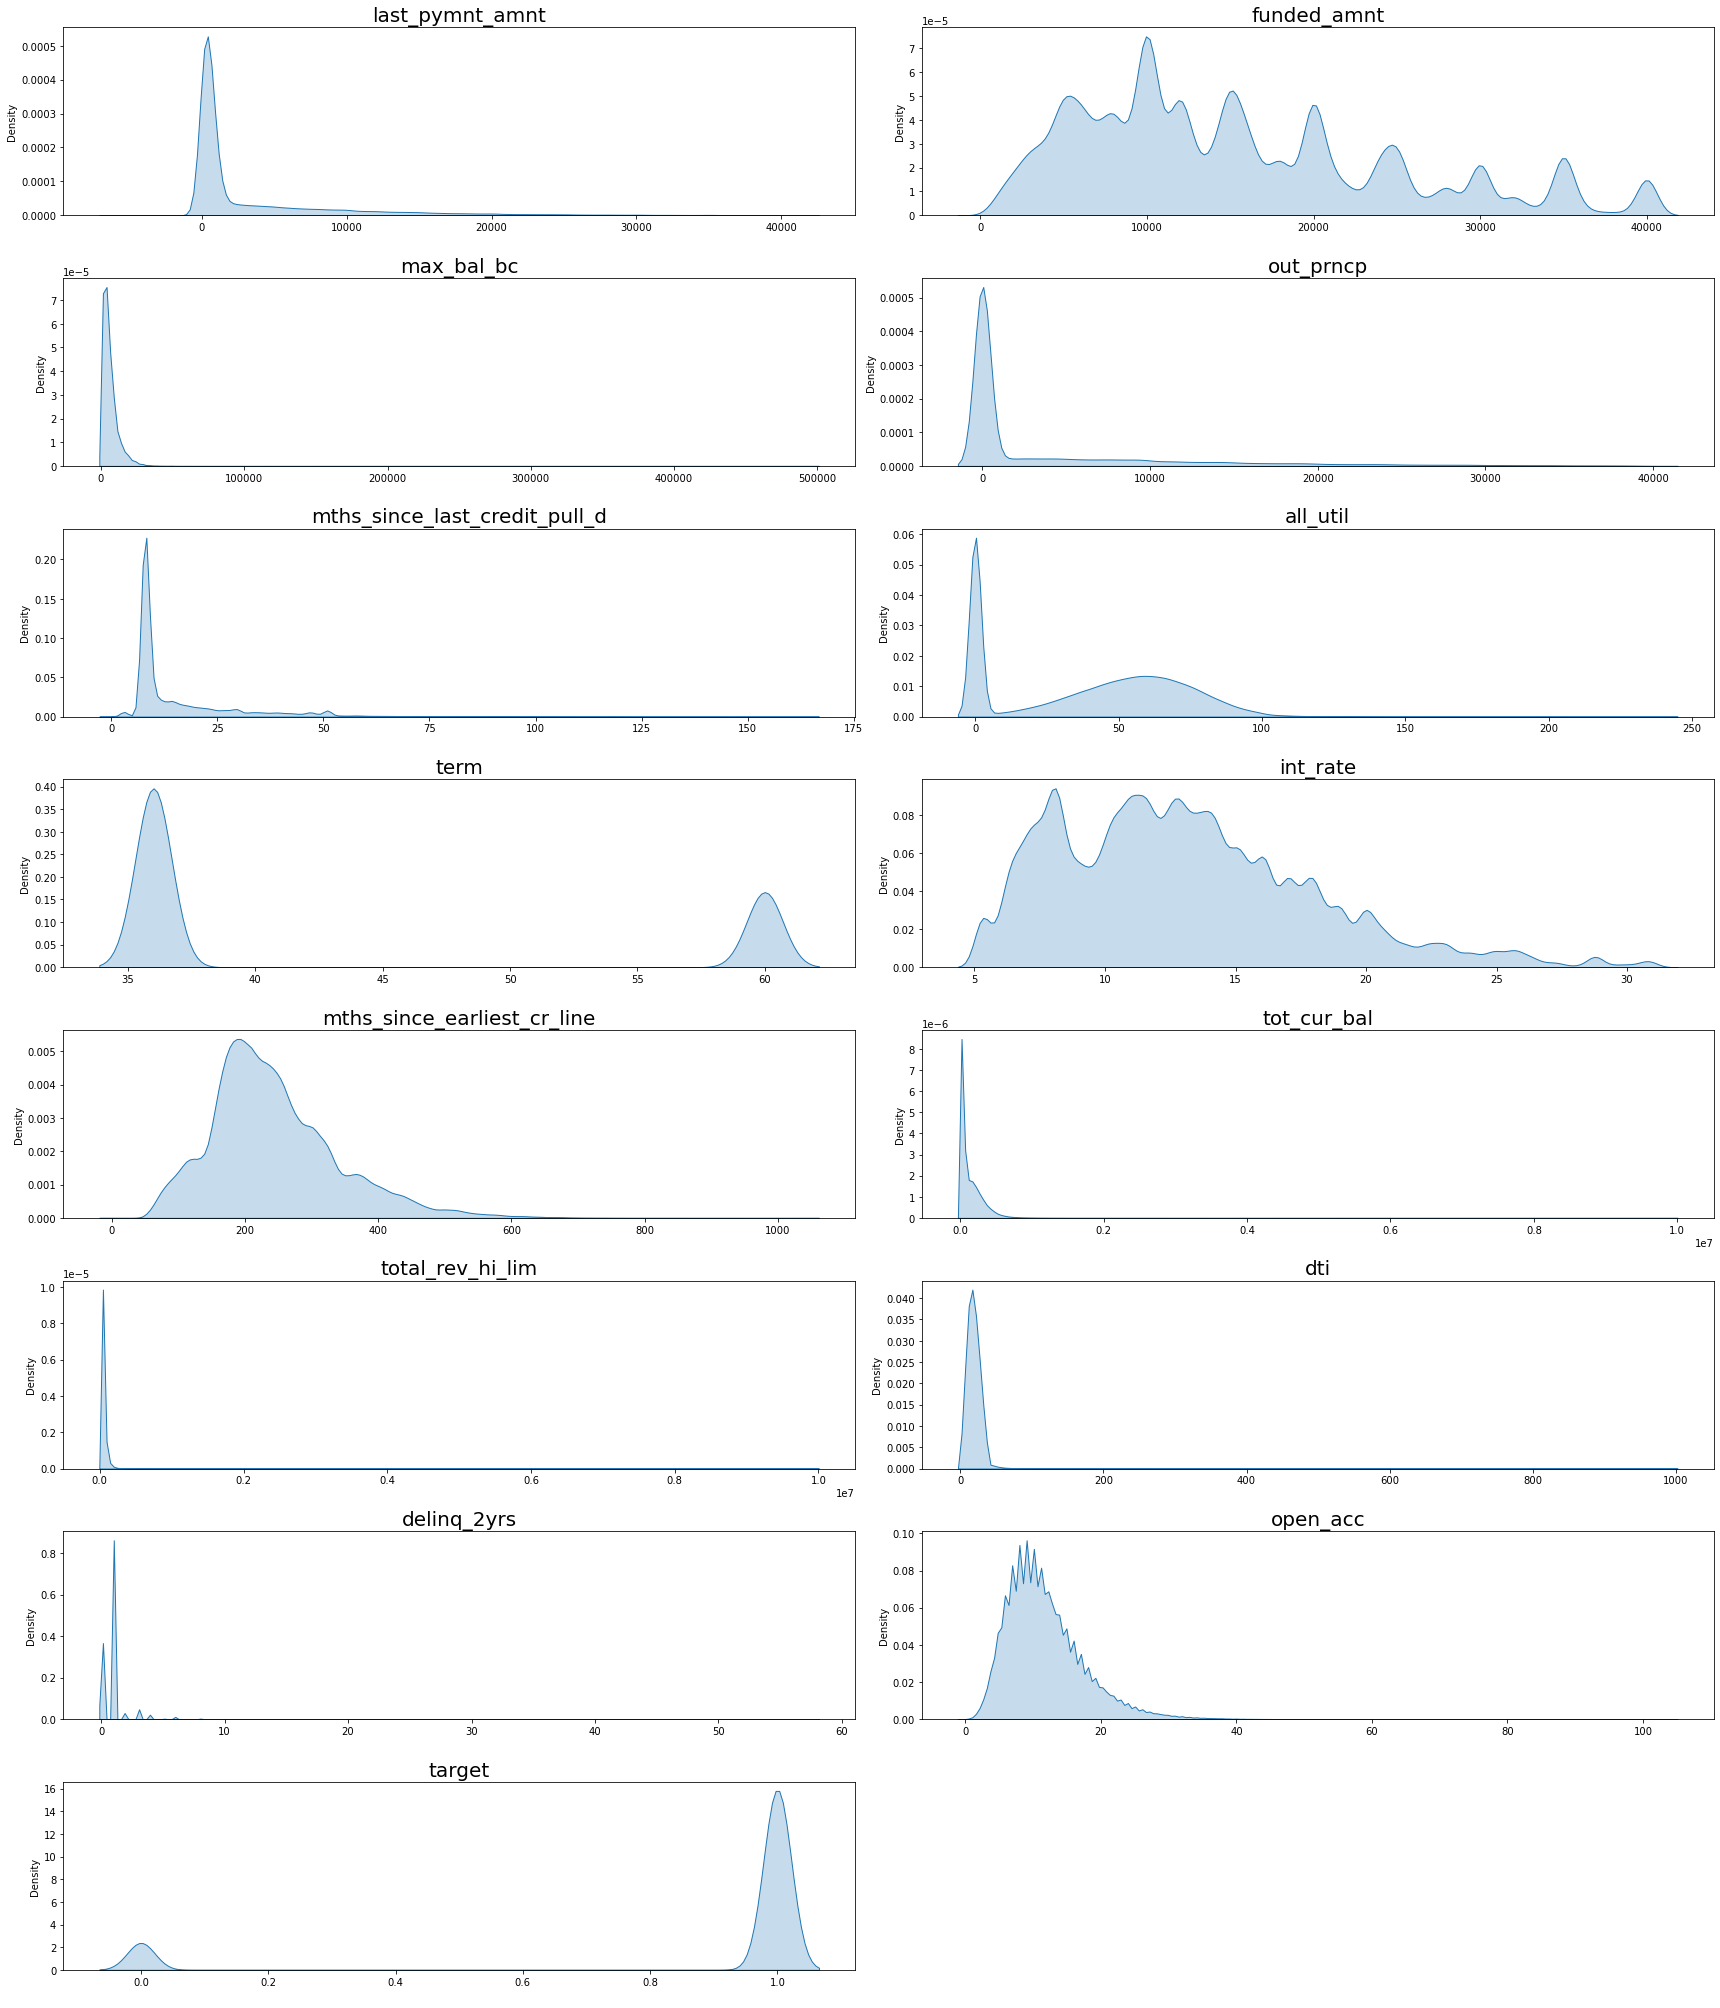

In [12]:
plt.figure(figsize=(24, 28))

for i in range(0,len(var_num)):
    plt.subplot(8, 2, i + 1)
    sns.kdeplot(x = dados_LightGBM[var_num[i]], shade = True)
    plt.title(var_num[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

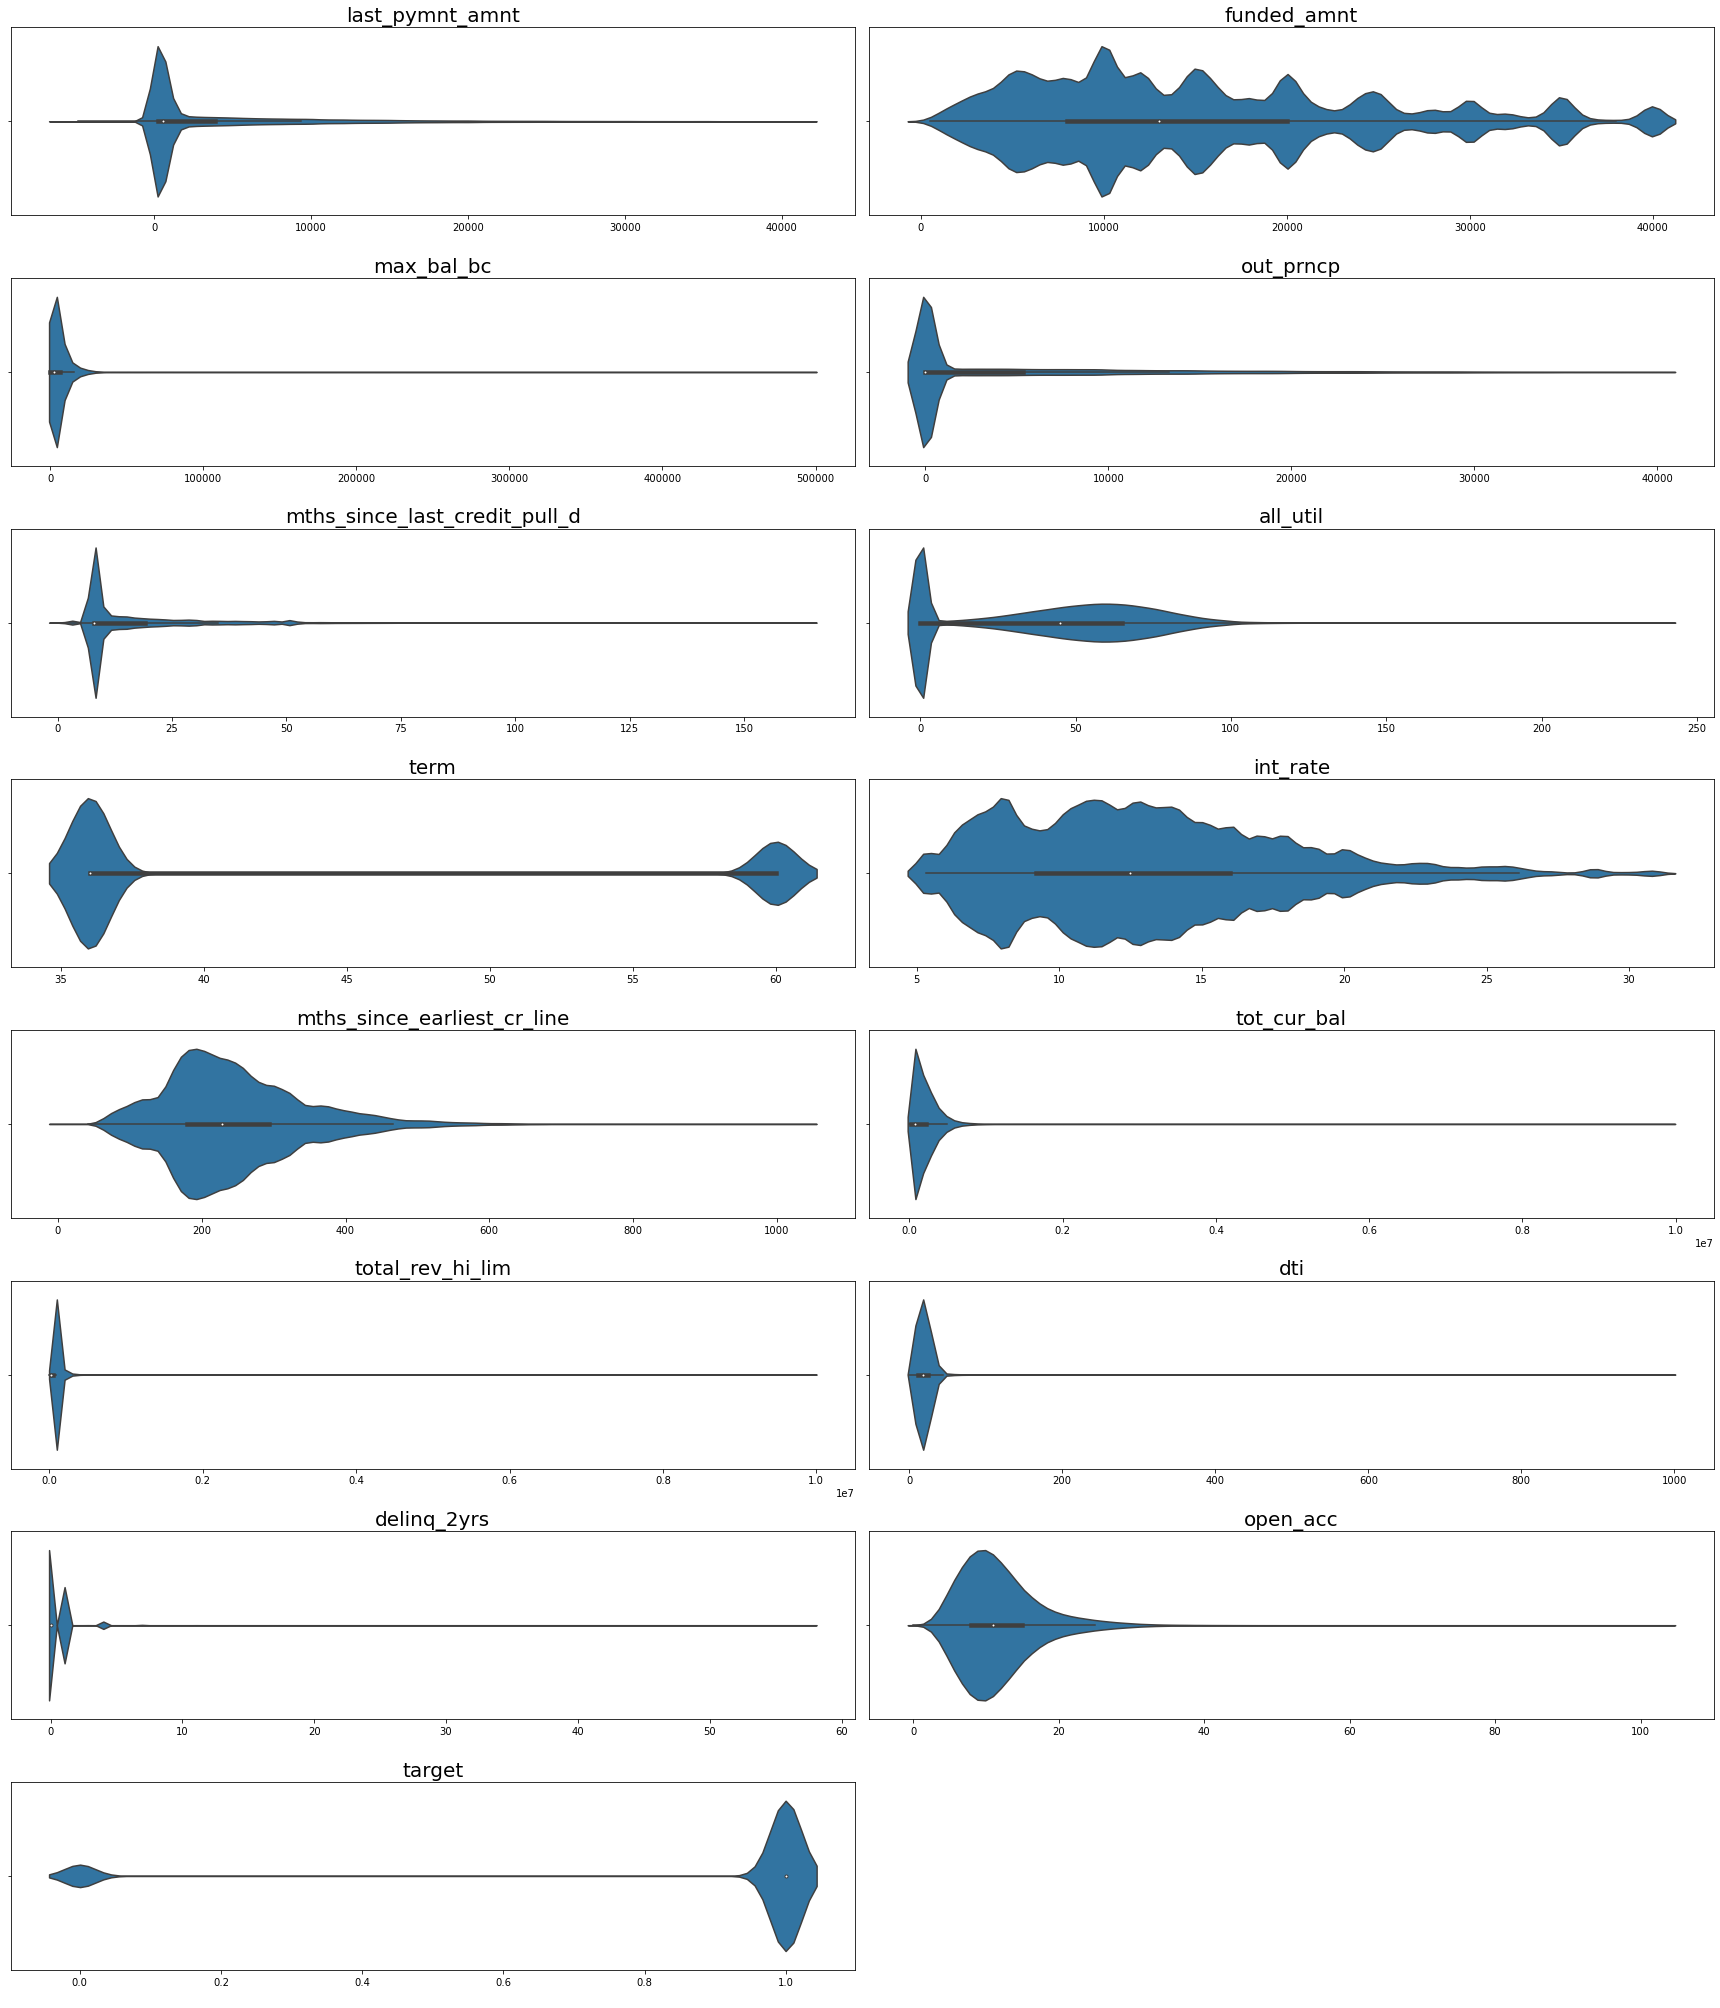

In [13]:
plt.figure(figsize=(24, 28))

for i in range(0,len(var_num)):
    plt.subplot(8, 2, i + 1)
    sns.violinplot(x = dados_LightGBM[var_num[i]], shade = True)
    plt.title(var_num[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

### Avaliando a distribuição das variáveis categóricas

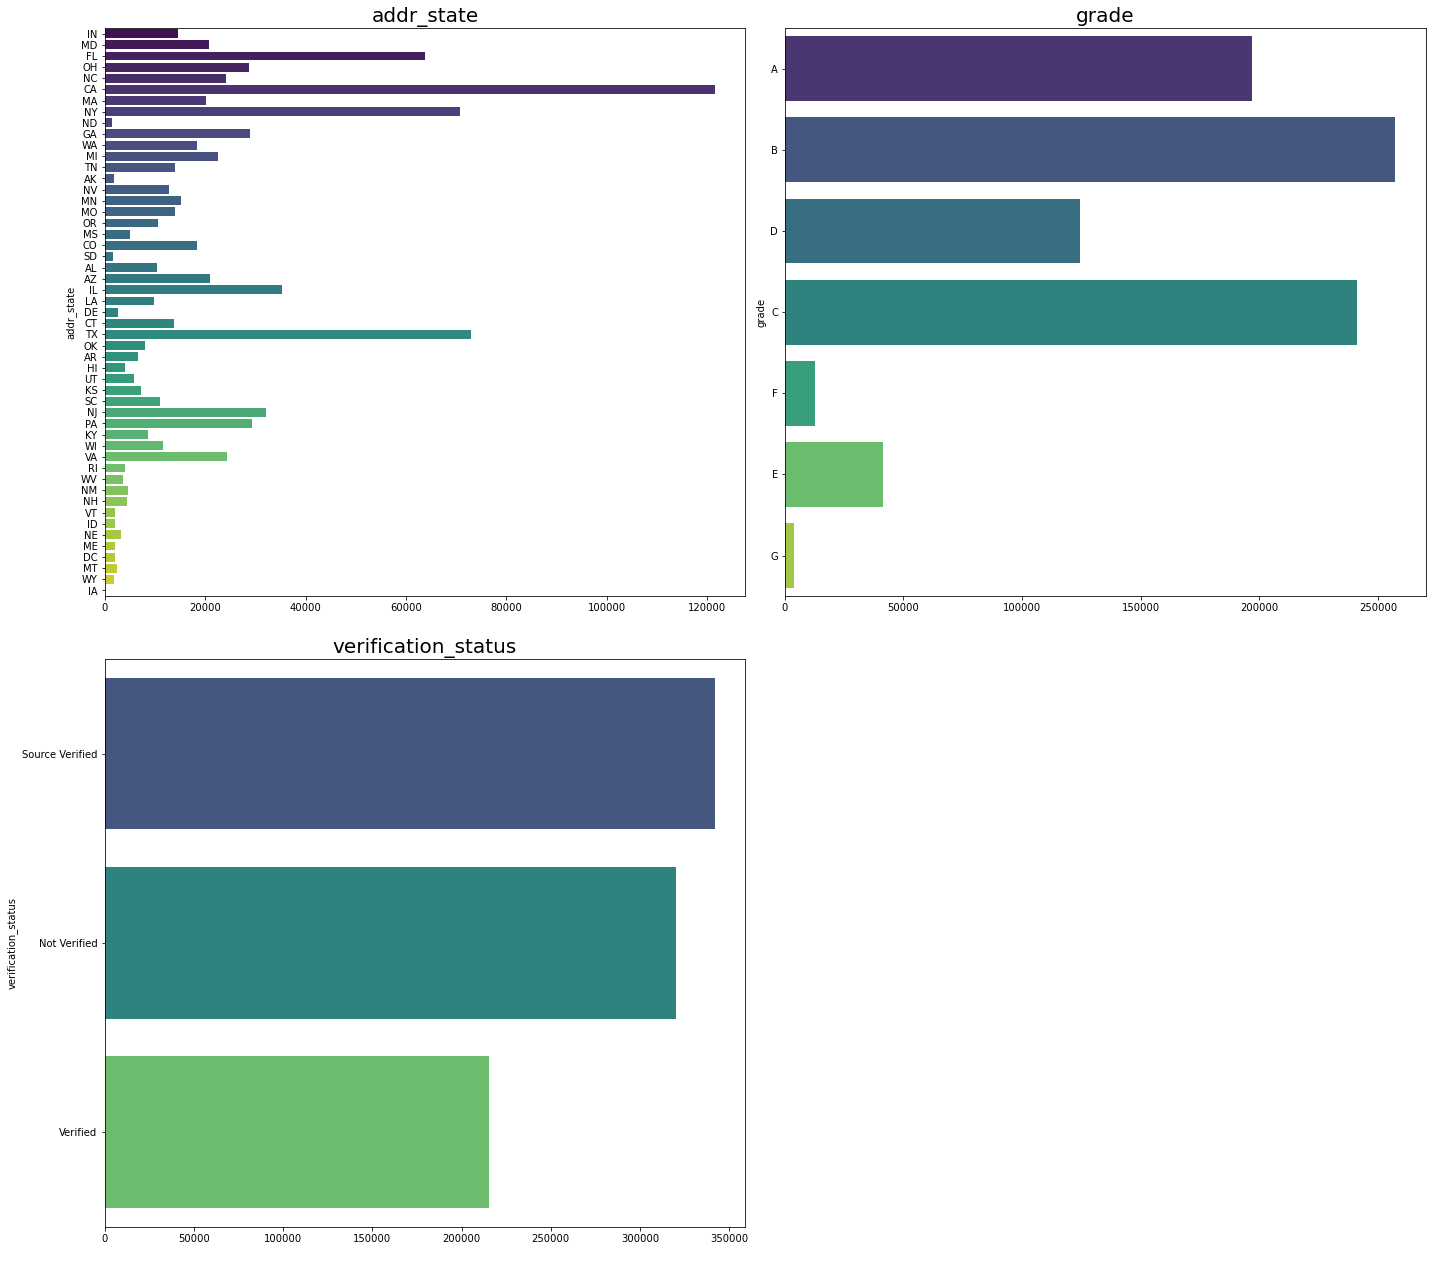

In [33]:
plt.figure(figsize=(20, 26))

for i in range(0, len(var_cat)):
    plt.subplot(3, 2, i + 1)
    sns.countplot(y = dados_LightGBM[var_cat[i]], palette = 'viridis')
    plt.title(var_cat[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

### Análise bivariada

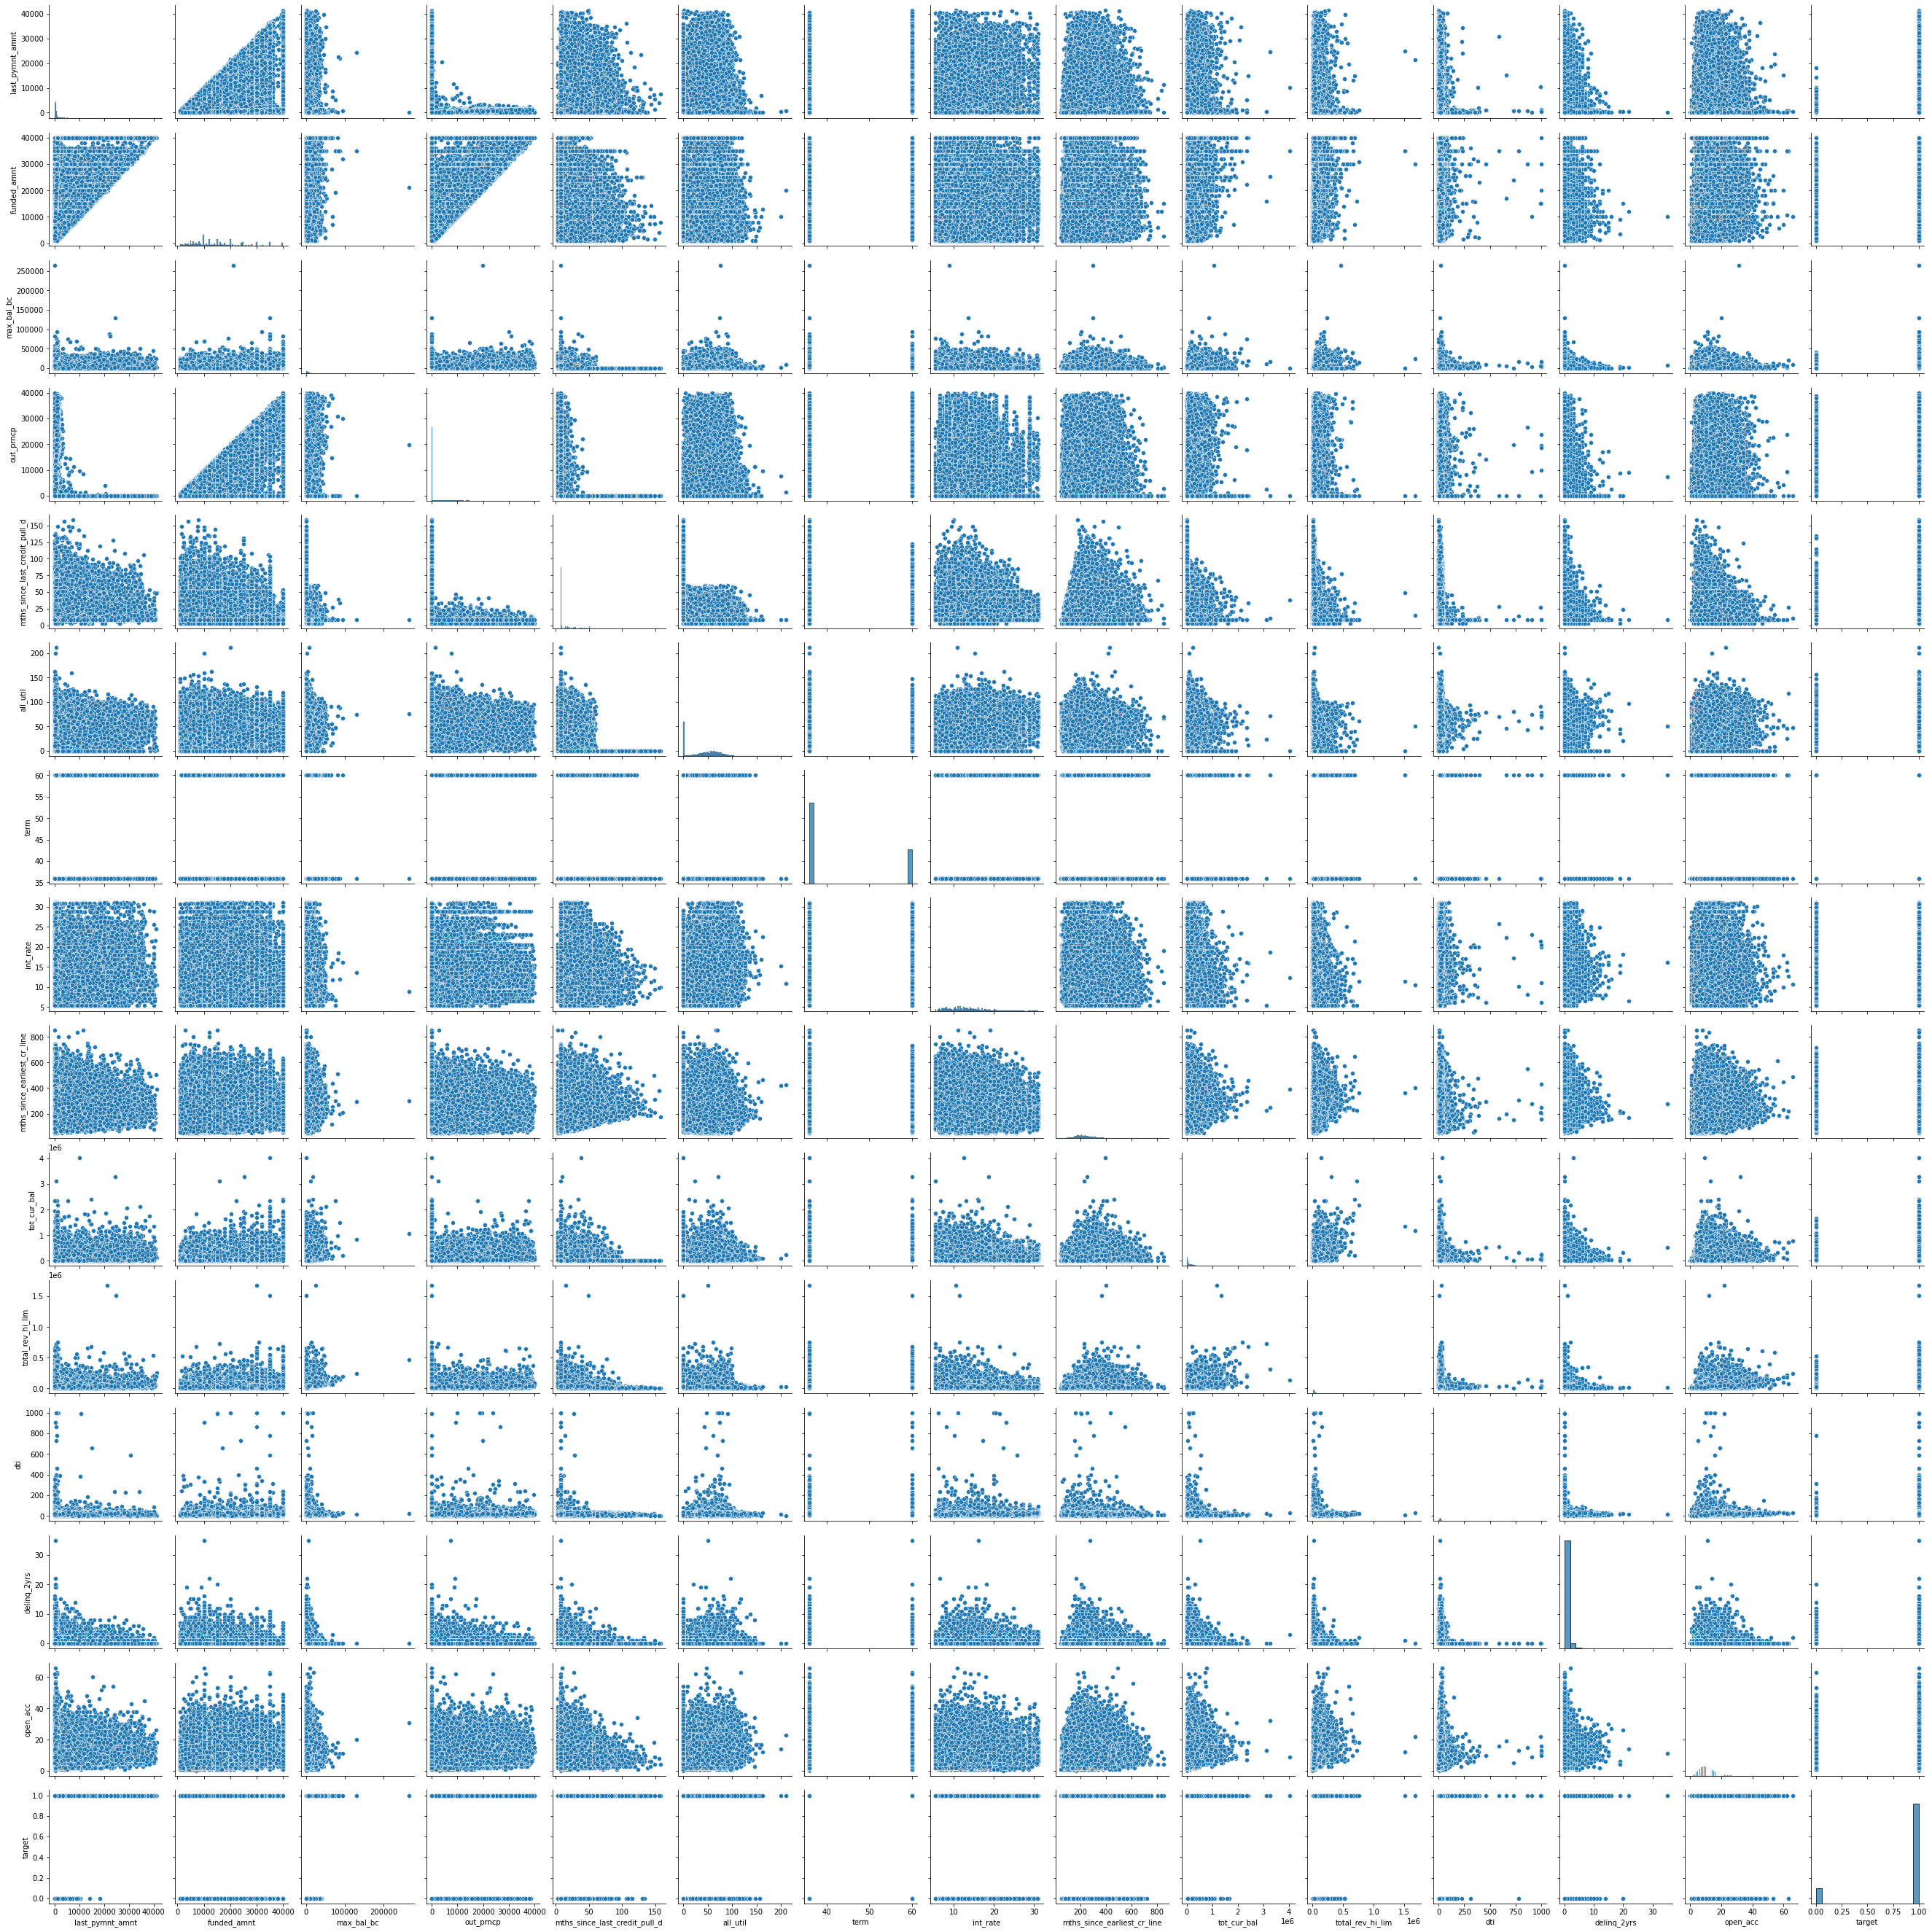

In [15]:
# pairplot das variáveis
sns.pairplot(dados_LightGBM);

Fica evidente o desbalanceamento da base de dados

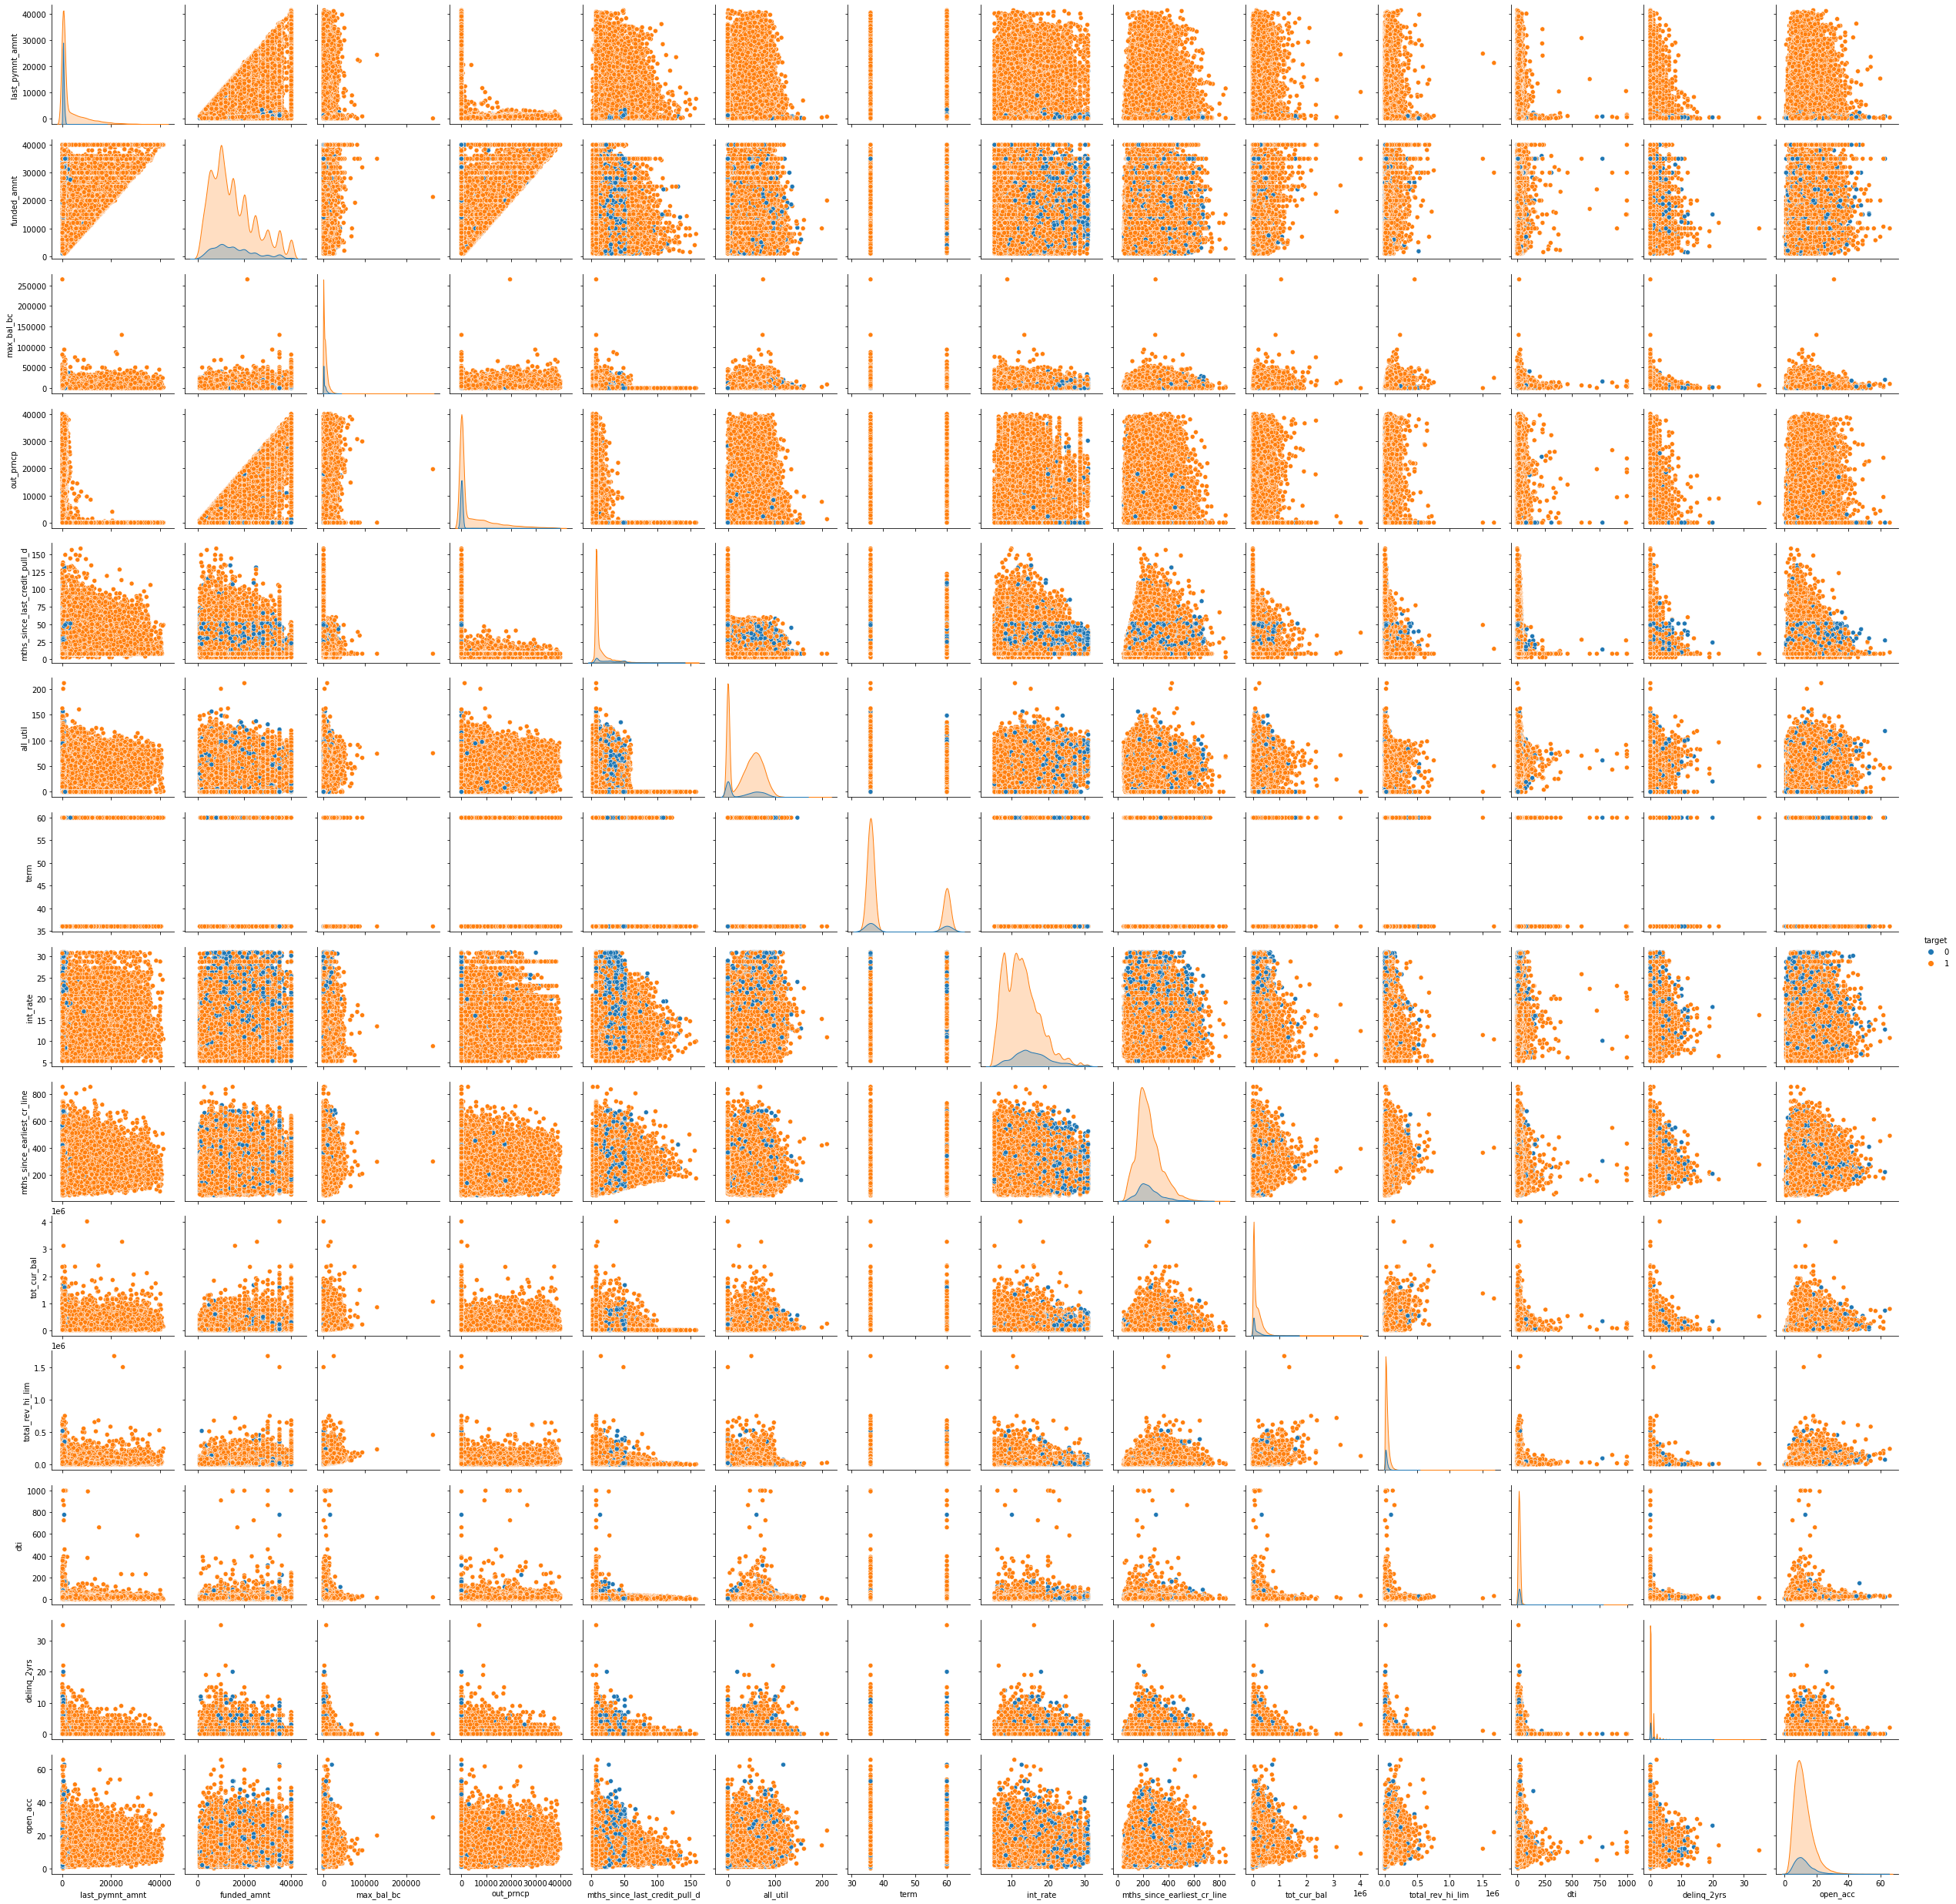

In [16]:
# pairplot usando target como hue
sns.pairplot(df, hue='target');

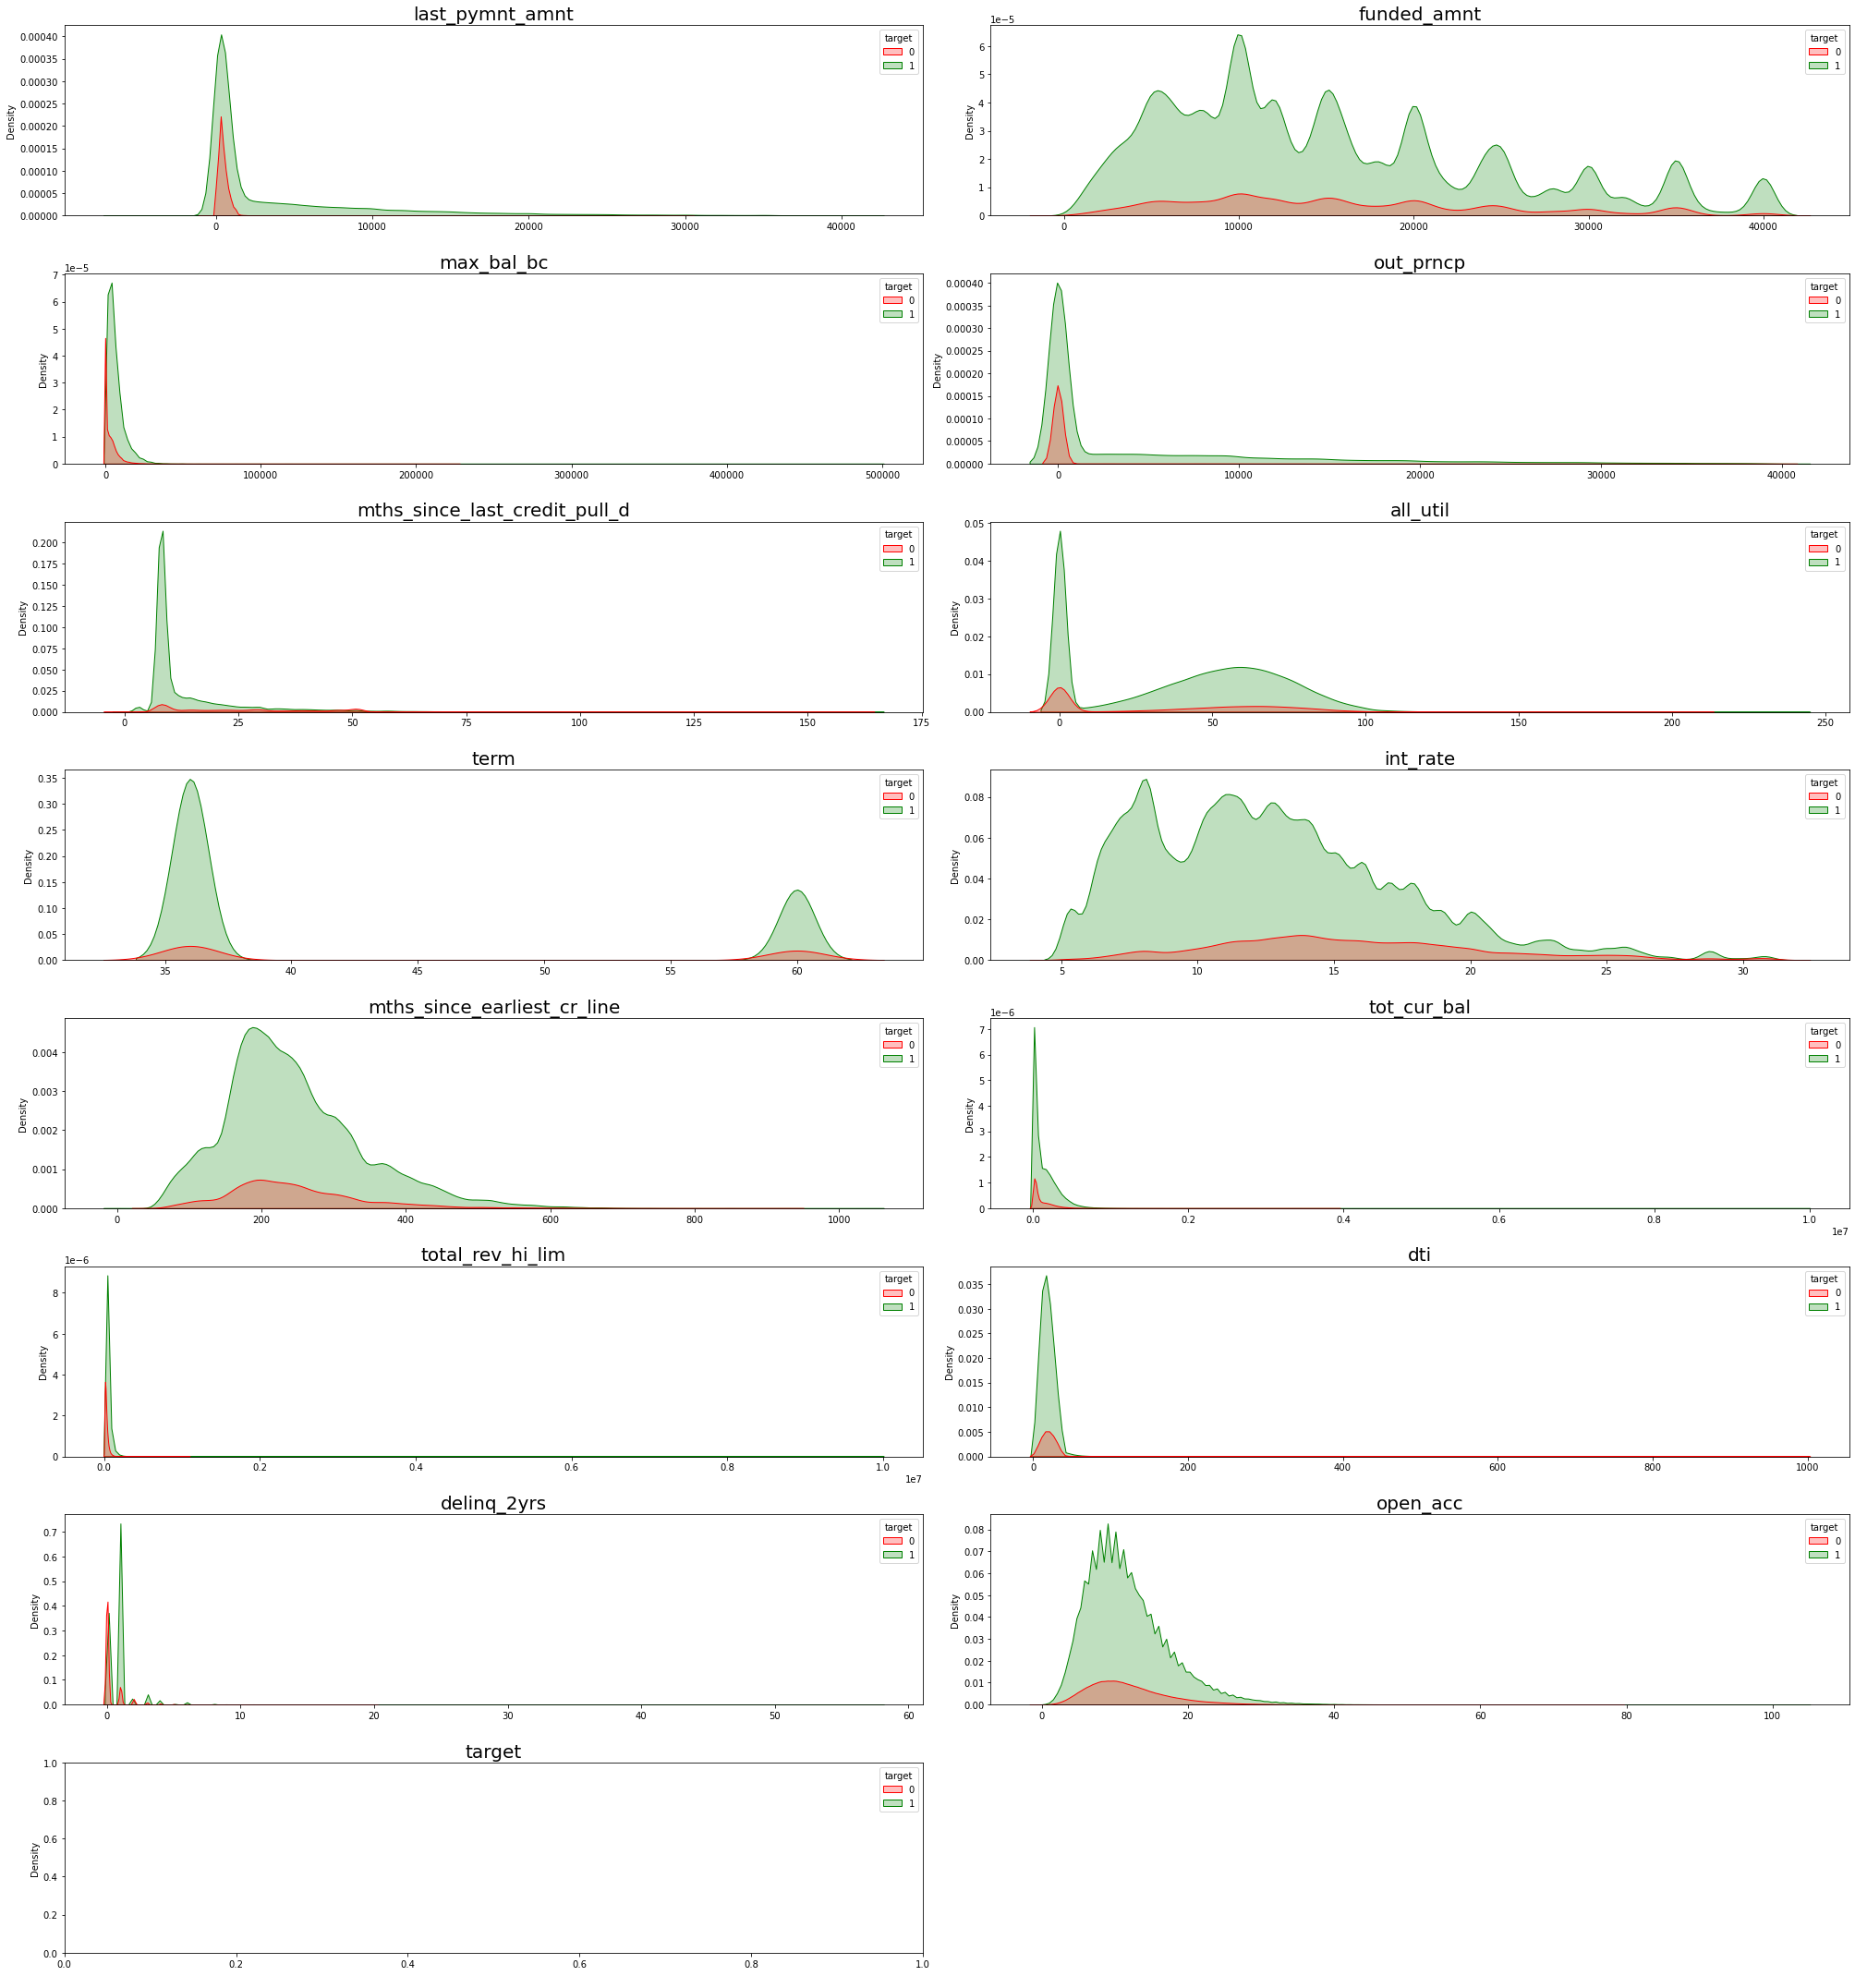

In [29]:
plt.figure(figsize=(28, 30))

for i in range(0,len(var_num)):
    plt.subplot(8, 2, i + 1)
    sns.kdeplot(x = dados_LightGBM[var_num[i]], 
                palette = ['red', 'green'], 
                shade = True, 
                hue = dados_LightGBM['target'],
                warn_singular = False)
    
    plt.title(var_num[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

- A taxa de adimplência é muito próxima em empréstimo que a fonte de rende foi verificada ou não;

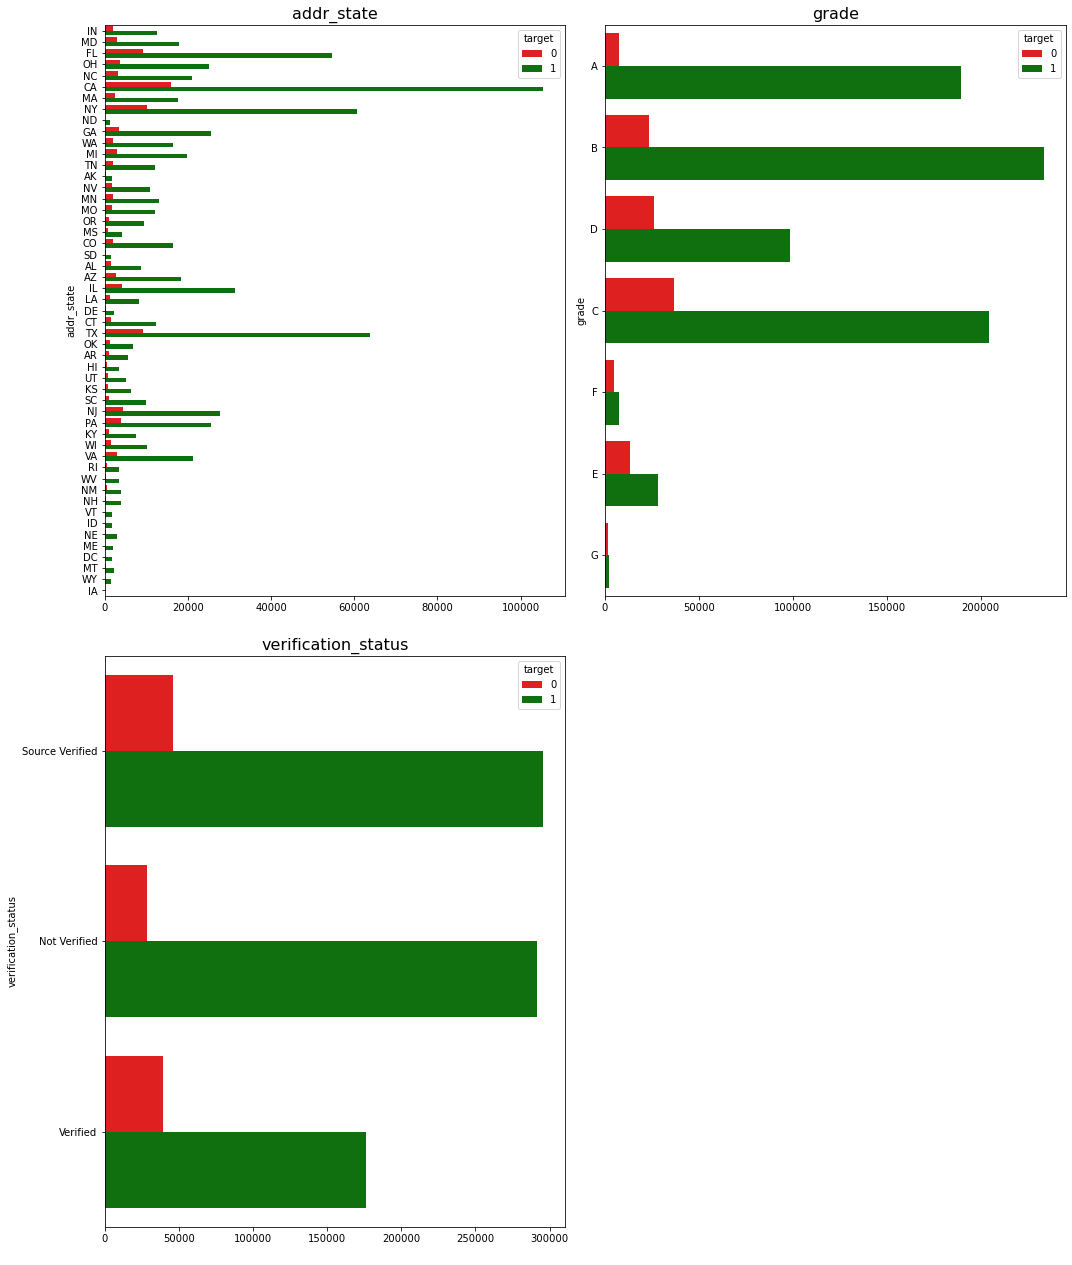

In [28]:
plt.figure(figsize=(15, 26))

for i in range(0, len(var_cat)):
    plt.subplot(3, 2, i + 1)
    sns.countplot(y = dados_LightGBM[var_cat[i]], palette = ['red', 'green'], hue = dados_LightGBM['target'])
    plt.title(var_cat[i], fontsize = 16)
    plt.xlabel(' ')
    plt.tight_layout()

Maior média, mediana e desvio padrão nas variáveis `tot_cur_bal` e `total_rev_hi_lim`

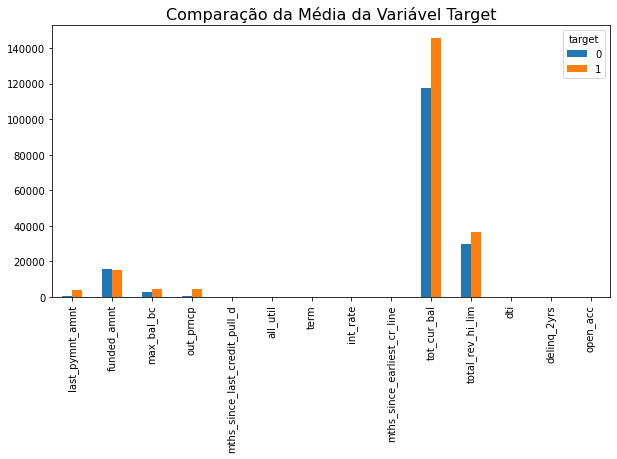

In [20]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
dados_LightGBM.groupby('target', as_index=True).mean().T.plot(kind='bar', ax=ax, rot=90)
plt.title('Comparação da Média da Variável Target', fontsize=16);

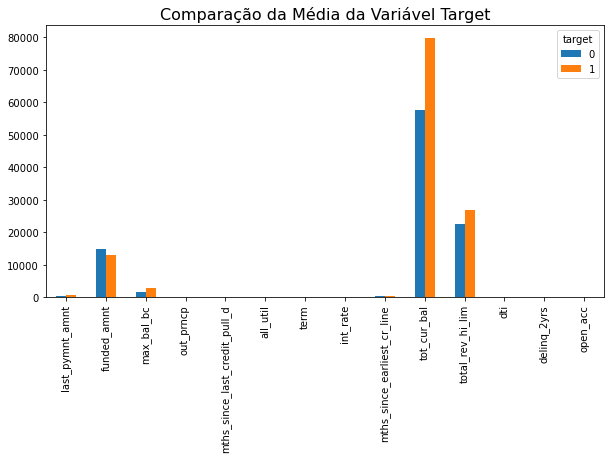

In [21]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
dados_LightGBM.groupby('target', as_index=True).median().T.plot(kind='bar', ax=ax, rot=90)
plt.title('Comparação da Média da Variável Target', fontsize=16);

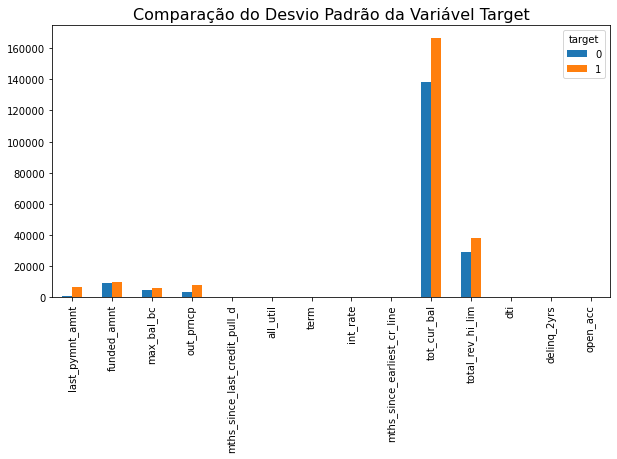

In [22]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
dados_LightGBM.groupby('target', as_index=True).std().T.plot(kind='bar', ax=ax, rot=90)
plt.title('Comparação do Desvio Padrão da Variável Target', fontsize=16);

### Correlação

- Todas as variáveis apresentam uma correlação fraca com a variável target tanto positiva, quanto negativa.

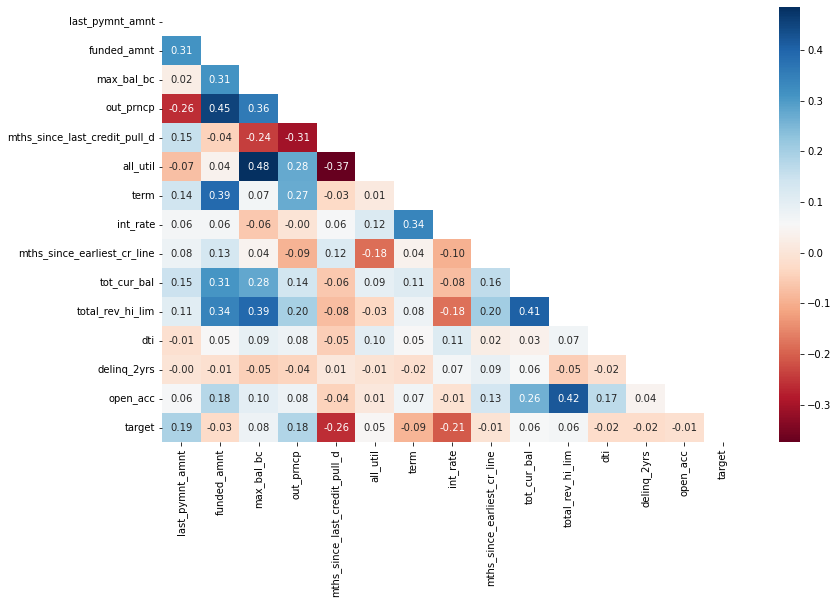

In [23]:
# matriz de correlação das variáveis 
sns.set_context(font_scale = 1.9)
plt.figure(figsize = (13,8))
sns.heatmap(
    dados_LightGBM.corr(), 
    annot = True, 
    fmt = '.2f', 
    cmap = 'RdBu',
    mask = np.triu(
        np.ones_like(dados_LightGBM.corr()) 
    ) 
);

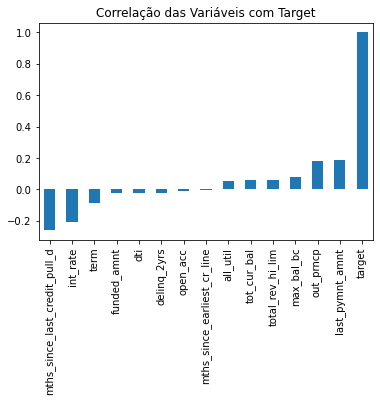

In [24]:
dados_LightGBM.corr()['target'].sort_values().plot(kind='bar')
plt.title('Correlação das Variáveis com Target');

---